In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def generate_model():
    model = tf.keras.Sequential([
        # Convolutional layer with 64 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

        # Convolutional layer with 128 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

        # Flattening layer to convert the output of the convolutional layers to a 1D vector
        tf.keras.layers.Flatten(),

        # Dense layer with 1024 units and ReLU activation
        tf.keras.layers.Dense(1024, activation='relu'),

        # Output layer with 32 units and softmax activation
        tf.keras.layers.Dense(32, activation='softmax')
    ])

    # Define the Gaussian filter kernel
    gaussian_kernel = tf.constant([[1, 4, 7, 4, 1],
                                   [4, 16, 26, 16, 4],
                                   [7, 26, 41, 26, 7],
                                   [4, 16, 26, 16, 4],
                                   [1, 4, 7, 4, 1]], dtype=tf.float32) / 273.0

    # Define a lambda function to apply the filter to the input image
    apply_filter = lambda x: tf.nn.conv2d(x, tf.reshape(gaussian_kernel, (5, 5, 1, 1)), strides=[1, 1, 1, 1], padding='SAME')

    # Create a new model that applies the filter to the input image before passing it to the original model
    filtered_model = tf.keras.Sequential([
        # Lambda layer to apply the filter to the input image
        tf.keras.layers.Lambda(apply_filter),
        # Original model defined above
        model
    ])

    return filtered_model


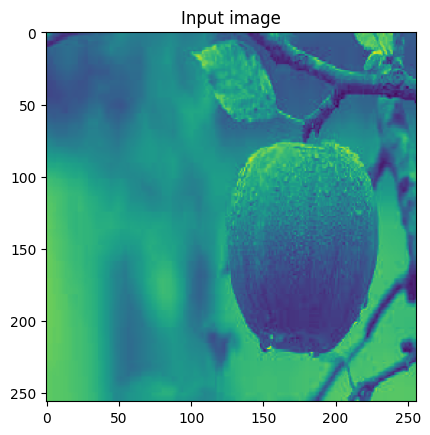

2023-05-08 23:58:14.709376: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 3s 3s/step


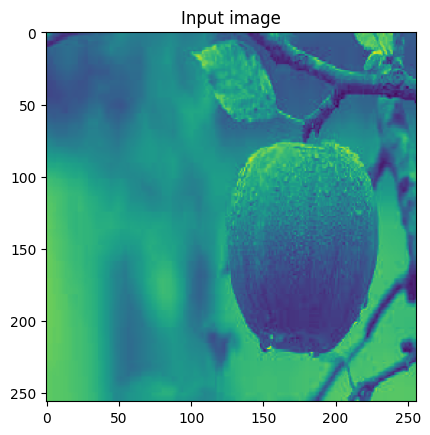

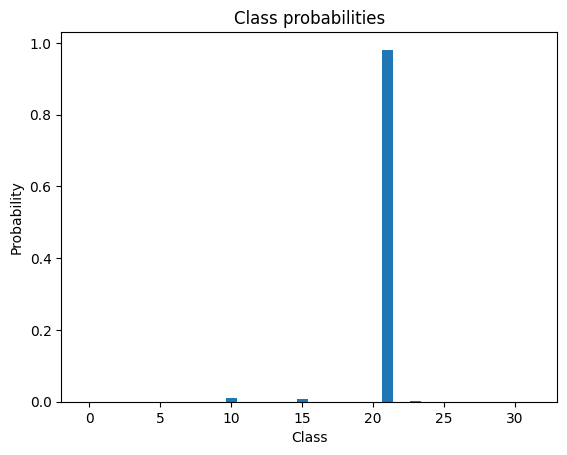

In [10]:

# Load the image and convert it to a NumPy array
img = tf.keras.preprocessing.image.load_img('/Users/debaryadutta/learn_dl/mit_6.S191/image_ml.jpg', color_mode='grayscale', target_size=(256, 256))

plt.imshow(img)
plt.title('Input image')
plt.show()

img_array = tf.keras.preprocessing.image.img_to_array(img)

# Expand the dimensions of the array to add an extra dimension for the color channels
img_array = np.expand_dims(img_array, axis=0)

# Define the model

# Generate the model
model = generate_model()

# Predict the class probabilities for the input image
preds = model.predict(img_array)

# Plot the input image and the predicted class probabilities
plt.imshow(img)
plt.title('Input image')
plt.show()

plt.bar(range(32), preds[0])
plt.title('Class probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()


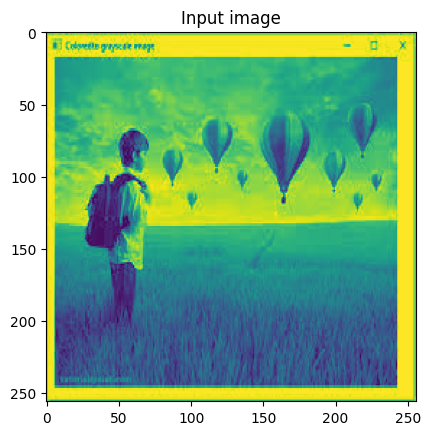

1/1 [==============================] - 1s 716ms/step


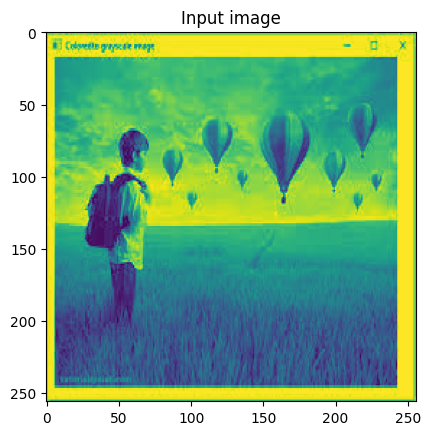

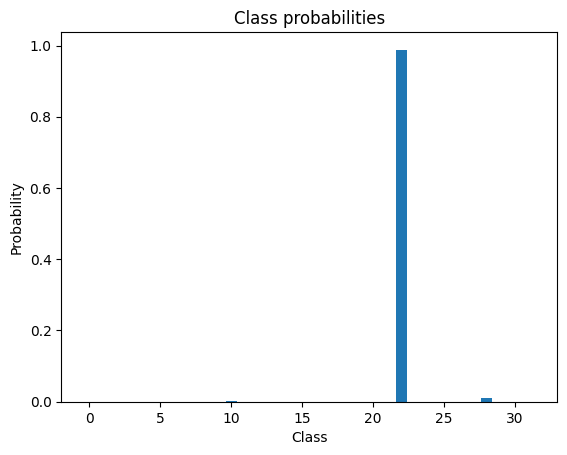

In [17]:
# Load the image and convert it to a NumPy array
img = tf.keras.preprocessing.image.load_img('/Users/debaryadutta/learn_dl/mit_6.S191/confuse.jpg', color_mode='grayscale', target_size=(256, 256))

plt.imshow(img)
plt.title('Input image')
plt.show()

img_array = tf.keras.preprocessing.image.img_to_array(img)

# Expand the dimensions of the array to add an extra dimension for the color channels
img_array = np.expand_dims(img_array, axis=0)

# Define the model

# Generate the model
model = generate_model()

# Predict the class probabilities for the input image
preds = model.predict(img_array)

# Plot the input image and the predicted class probabilities
plt.imshow(img)
plt.title('Input image')
plt.show()

plt.bar(range(32), preds[0])
plt.title('Class probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()
